<a href="https://colab.research.google.com/github/EvidenceN/Computer-Vision-TensorFlow/blob/master/Week_2_Assignment_Tensorflow_handwriting_mnist_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exercise 2
In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [0]:
import tensorflow as tf
from os import path, getcwd, chdir
import matplotlib.pyplot as plt
from tensorflow import keras


# if working on local environment, grab mnist.npz from coursera notebook
# and place it inside a local folder and edit the path to that location
path = f"{getcwd()}/.../tmp2/mnist.npz" 

# getting the dataset
mnist = tf.keras.datasets.mnist

# setting variables to extract datasets from the dataset. 
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

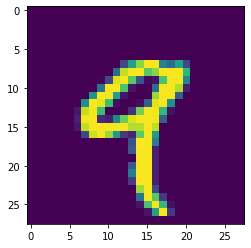

In [40]:
# getting an idea of what images are in our dataset. 
plt.imshow(train_images[4])

In [41]:
# finding out the values making up an image
print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [0]:
# standardizing the values to 0's and 1's
train_images = train_images/255
test_images = test_images/255

In [0]:
# designing the model with neural networks
model = tf.keras.models.Sequential([keras.layers.Flatten(),
                                     keras.layers.Dense(128, activation=tf.nn.relu),
                                     keras.layers.Dense(10, activation=tf.nn.softmax)])




In [0]:
# creating a class that will cause our model to stop training when we reach 99% accuracy
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.99):
      print('\nReached 99% accuracy so cancelling training')
      self.model.stop_training = True

In [0]:
# instatiating callback class. 
callback = myCallback()

In [46]:
# compiling the model and fitting the model to training dataset
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(train_images, train_labels, epochs = 10,
          callbacks = [callback])

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2559 - acc: 0.9265
Epoch 2/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1119 - acc: 0.9674
Epoch 3/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0775 - acc: 0.9775
Epoch 4/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0588 - acc: 0.9827
Epoch 5/10
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0453 - acc: 0.9865
Epoch 6/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.0353 - acc: 0.9887
Epoch 7/10
59840/60000 [============================>.] - ETA: 0s - loss: 0.0295 - acc: 0.9910
Reached 99% accuracy so cancelling training
60000/60000 [==============================] - 5s 77us/sample - loss: 0.0295 - acc: 0.9909


In [47]:
# testing to see if our model works and if it can detect an image from a new
# untested dataset
classification = model.predict(test_images)

# testing to see if prediction works. 
print(classification[4])

[1.6823885e-08 3.0102871e-09 6.7591536e-06 4.4790229e-09 9.9803799e-01
 4.8474533e-08 6.3091619e-07 2.6624421e-06 2.8842960e-08 1.9518813e-03]


In [48]:
# verifying the classificatio i got above
print(test_labels[4])

4


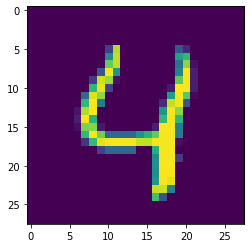

In [49]:
# verifying that test image 4 mathes the label above. 
plt.imshow(test_images[4])